<a href="https://colab.research.google.com/github/siddharthramagiri/Machine-Learning/blob/main/Mall_Customers_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [80]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [81]:
data.drop(columns=['Gender'],inplace=True)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [82]:
pd.DataFrame(data.isna().sum(), columns=['Null Sums'])

,Null Sums
CustomerID,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


So we Dont have any Null Values

<ipython-input-83-5b4fbb4ee934>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])
<ipython-input-83-5b4fbb4ee934>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])
<ipython-input-83-5b4fbb4ee934>:10: UserWarning: 

`distplot` is a deprecated function and wi

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

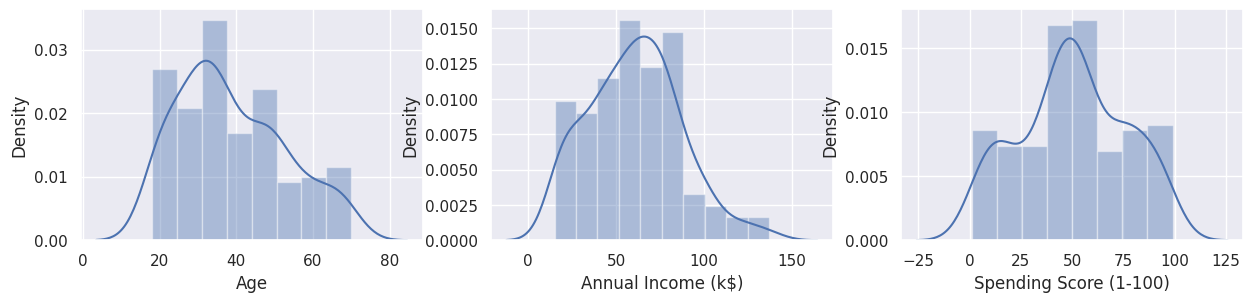

In [83]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.distplot(data['Age'])

plt.subplot(1,3,2)
sns.distplot(data['Annual Income (k$)'])

plt.subplot(1,3,3)
sns.distplot(data['Spending Score (1-100)'])

**K-Means Clustering**

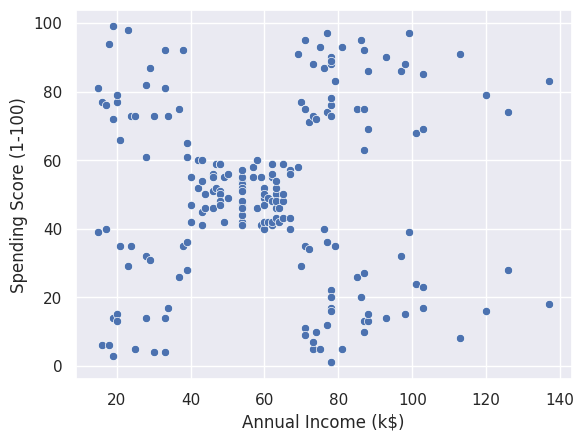

In [84]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',legend=True)
plt.show()

In [85]:
df2 = data[['Annual Income (k$)','Spending Score (1-100)']].copy()

In [89]:
wcss = []
krange = range(1,10)
for k in krange :
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

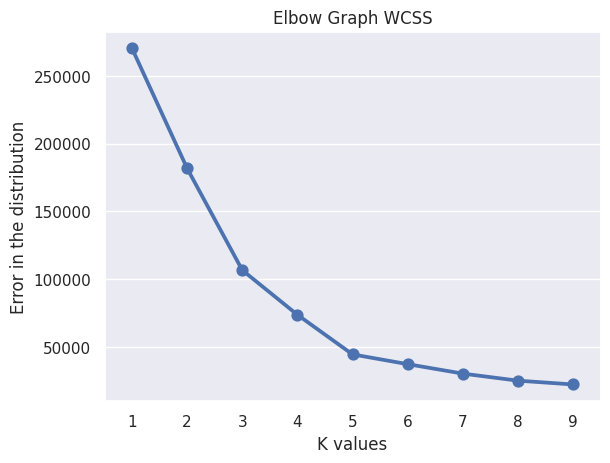

In [90]:
sns.pointplot(x=krange,y=wcss)
plt.xlabel("K values")
plt.ylabel("Error in the distribution")
plt.title("Elbow Graph WCSS")
plt.show()

So, K no. of clusters = 5

In [91]:
kmeans = KMeans(n_clusters= 5, init="k-means++", max_iter= 1000)
df2['clusters'] = kmeans.fit_predict(df2)
df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


In [96]:
kmeans.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [97]:
cl0 = df2[df2['clusters'] == 0].copy()
cl1 = df2[df2['clusters'] == 1].copy()
cl2 = df2[df2['clusters'] == 2].copy()
cl3 = df2[df2['clusters'] == 3].copy()
cl4 = df2[df2['clusters'] == 4].copy()

In [116]:
centroids = kmeans.cluster_centers_
centroids

array([[8.65384615e+01, 8.21282051e+01, 3.00000000e+00],
       [2.63043478e+01, 2.09130435e+01, 4.00000000e+00],
       [8.82000000e+01, 1.71142857e+01, 2.00000000e+00],
       [2.57272727e+01, 7.93636364e+01, 1.00000000e+00],
       [5.52962963e+01, 4.95185185e+01, 1.77635684e-15]])

Graph of Clusters with Colors

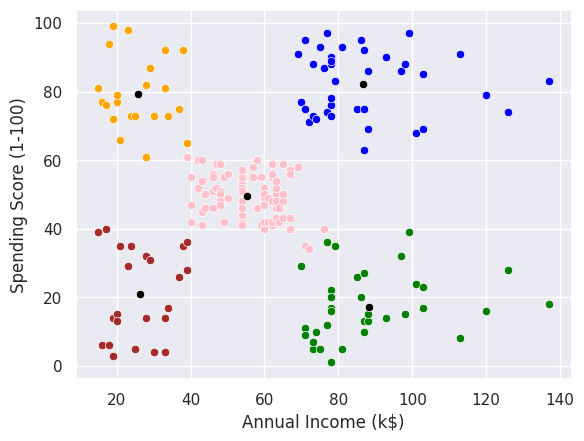

In [132]:
sns.scatterplot(data=cl0,x='Annual Income (k$)',y='Spending Score (1-100)',color='blue')
sns.scatterplot(data=cl1,x='Annual Income (k$)',y='Spending Score (1-100)',color='brown')
sns.scatterplot(data=cl2,x='Annual Income (k$)',y='Spending Score (1-100)',color='green')
sns.scatterplot(data=cl3,x='Annual Income (k$)',y='Spending Score (1-100)',color='orange')
sns.scatterplot(data=cl4,x='Annual Income (k$)',y='Spending Score (1-100)',color='pink')

sns.scatterplot(x=centroids[:,0],y=centroids[:,1],color='black')
plt.show()

In [135]:
df3 = data.iloc[:,1:4].copy()

In [136]:
wcss = {}
krange = range(1,10)
for k in krange :
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  kmeans.fit(df3)
  wcss[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

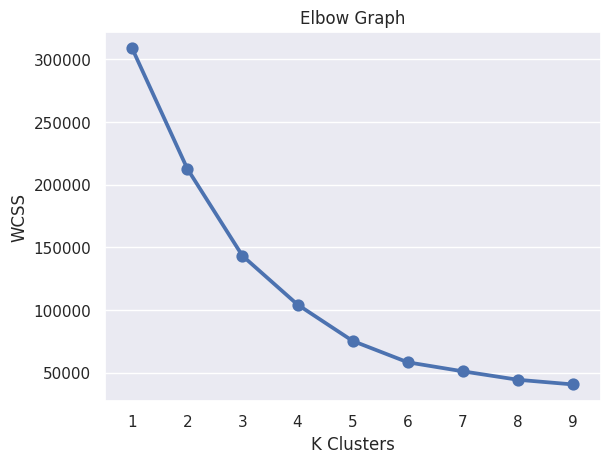

<Figure size 500x300 with 0 Axes>

In [147]:
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.ylabel("WCSS")
plt.xlabel("K Clusters")
plt.title("Elbow Graph")
plt.figure(figsize=(5,3))
plt.show()

k no. of clusters = 6 with 3 features

In [149]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
df3['clusters'] = Model2.fit_predict(df3)
df3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,1
1,21,15,81,5
2,20,16,6,1
3,23,16,77,5
4,31,17,40,1


In [150]:
Model2.labels_

array([1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 4, 5, 4, 2,
       1, 5, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [151]:
centroids = Model2.cluster_centers_
centroids

array([[ 3.26923077e+01,  8.65384615e+01,  8.21282051e+01,
        -1.33226763e-15],
       [ 4.41428571e+01,  2.51428571e+01,  1.95238095e+01,
         3.00000000e+00],
       [ 2.70000000e+01,  5.66578947e+01,  4.91315789e+01,
         1.00000000e+00],
       [ 4.16857143e+01,  8.82285714e+01,  1.72857143e+01,
         2.00000000e+00],
       [ 5.61555556e+01,  5.33777778e+01,  4.90888889e+01,
         5.00000000e+00],
       [ 2.52727273e+01,  2.57272727e+01,  7.93636364e+01,
         4.00000000e+00]])

In [152]:
cl0 = df3[df3['clusters'] == 0].copy()
cl1 = df3[df3['clusters'] == 1].copy()
cl2 = df3[df3['clusters'] == 2].copy()
cl3 = df3[df3['clusters'] == 3].copy()
cl4 = df3[df3['clusters'] == 4].copy()
cl5 = df3[df3['clusters'] == 5].copy()

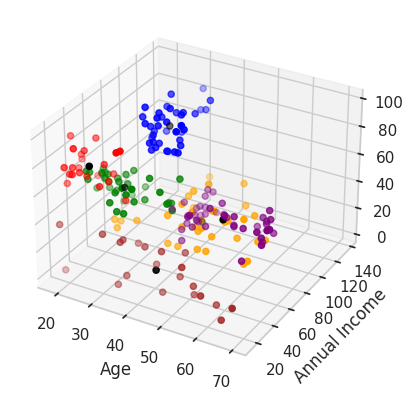

<Figure size 800x800 with 0 Axes>

In [170]:
ax = plt.axes(projection="3d")
sns.set_theme(style="whitegrid")
ax.scatter(cl0['Age'],cl0['Annual Income (k$)'],cl0['Spending Score (1-100)'],color='blue')
ax.scatter(cl1['Age'],cl1['Annual Income (k$)'],cl1['Spending Score (1-100)'],color='brown')
ax.scatter(cl2['Age'],cl2['Annual Income (k$)'],cl2['Spending Score (1-100)'],color='green')
ax.scatter(cl3['Age'],cl3['Annual Income (k$)'],cl3['Spending Score (1-100)'],color='orange')
ax.scatter(cl4['Age'],cl4['Annual Income (k$)'],cl4['Spending Score (1-100)'],color='purple')
ax.scatter(cl5['Age'],cl5['Annual Income (k$)'],cl5['Spending Score (1-100)'],color='red')

ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],color="black")

plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.figure(figsize=(8,8))
plt.show()

In [182]:
from sklearn.metrics import silhouette_score, accuracy_score, r2_score

In [184]:
silhouette = {}
krange = range(2,9)
for k in krange :
  kms = KMeans(n_clusters=k, init="k-means++", max_iter=1000)
  kms.fit(df3)
  silhouette[k] = silhouette_score(df3, kms.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

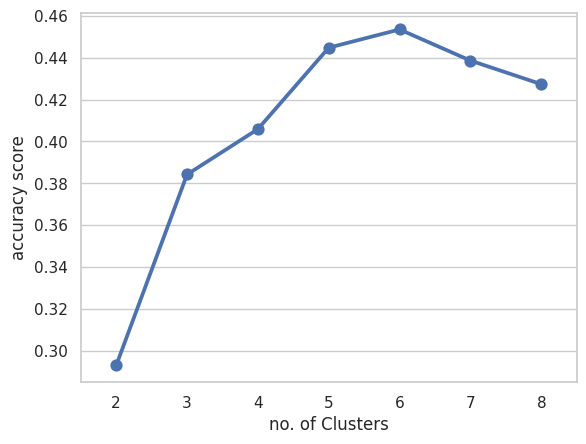

In [185]:
sns.pointplot(x = list(silhouette.keys()),y = list(silhouette.values()))
plt.xlabel("no. of Clusters")
plt.ylabel("accuracy score")
plt.show()

# Max Score is Obtained for **6** clusters